<a href="https://colab.research.google.com/github/AngelClaudio/DATA604/blob/master/Final%20Project/project_final_NBA_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA Team vs Team Monte Carlo Simulator

Author: Angel Claudio

## Abstract

The NBA 2018 season had a lot of close games and controversial topics that were hot among fans. As a data science student interested in data science for sports, I aim to dive into that season and gain some insight.

I was introduced to the Monte Carlo simulation technique by my professor, this research is to solidify my skills with Monte Carlo as well as getting answers to the aforementioned controvery of the 2018 NBA season.

## Monte Carlo

Monte Carlo is a solution that uses random sampling from both inside and outside an area of interest to compute an integral. That being said it is inherently random, and the more points you have, the more accurate it is. The great thing about that, is can integrate somewhat the most arbritrary of shapes with the right amount of simulation [1].



---



# Export, Transform, Load (ETL) Process

We are going to bring over the data originally from Kaggle into memory for initial analysis and later simulation.

In [ ]:
# Name Space Declarations
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style

# Surpress warnings for chain assignments
pd.options.mode.chained_assignment = None

# Improve Plot Visibility
style.use('dark_background')

In [ ]:
# Import data (originally from Kaggle) to data frame
url = 'https://github.com/AngelClaudio/DataSources/blob/master/nba_games_stats.csv?raw=true'

# 1st Column Used as Unique Identifier
original_nba_data = pd.read_csv(filepath_or_buffer = url, index_col=0)

# Take a look at the data frame
original_nba_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 1 to 82119
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      9840 non-null   object 
 1   Game                      9840 non-null   int64  
 2   Date                      9840 non-null   object 
 3   Home                      9840 non-null   object 
 4   Opponent                  9840 non-null   object 
 5   WINorLOSS                 9840 non-null   object 
 6   TeamPoints                9840 non-null   int64  
 7   OpponentPoints            9840 non-null   int64  
 8   FieldGoals                9840 non-null   int64  
 9   FieldGoalsAttempted       9840 non-null   int64  
 10  FieldGoals.               9840 non-null   float64
 11  X3PointShots              9840 non-null   int64  
 12  X3PointShotsAttempted     9840 non-null   int64  
 13  X3PointShots.             9840 non-null   float64
 14  FreeThr

We can see the 1st column is just a random key used for the data, so we used it to index our data frame instead of using it as an explanatory feature. Other than that, it seems the data structure is complicit to your standard NBA stats for teams.

In [ ]:
# Make copy and keep original (for debugging purposes)
nba_data = original_nba_data

# Transform Date Column from "object"(string) to date to make it easier to work with
nba_data['Date'] = pd.to_datetime(nba_data['Date'])

# Look at Dates
print(f"Dates for this data set are from {nba_data['Date'].min()} to {nba_data['Date'].max()}")

Dates for this data set are from 2014-10-28 00:00:00 to 2018-04-11 00:00:00


We turned the dates column that was initially just strings into dates for ease of use. Checking the minimum and maximum values of the dates column we can see we are dealing with data consisting of the 2014 - 2018 NBA seasons.

# Exploratory Data Analysis (EDA)

Here we will take a closer look at the data and analyze points of interests.

In [ ]:
# Subset Data into Two Teams for 2018 season, namely the finals teams.
golden_state = nba_data[(nba_data.Team == 'GSW') & (nba_data['Date'] > '2017-10-01')]
cleveland = nba_data[(nba_data.Team == 'CLE') & (nba_data['Date'] > '2017-10-01')]

We will subset the data to look at two teams using data from the 2018 season.

## Check for Normalization



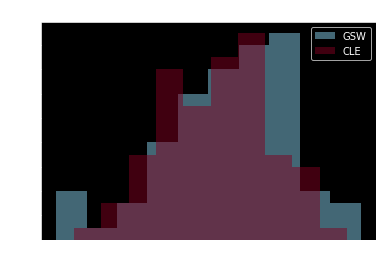

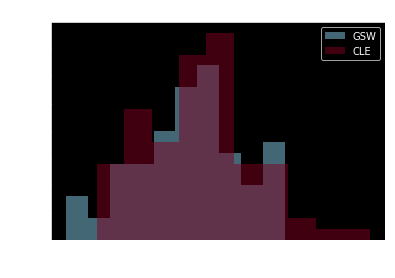

In [ ]:
# Visualize Data
golden_state.TeamPoints.plot(kind='hist', label='GSW', alpha = .5, color='#87ceeb')
cleveland.TeamPoints.plot(kind='hist', label='CLE', alpha = .5, color='#800020')
plt.legend()
plt.xlabel('Points')
plt.title('Points Scored During 2018 Season')
plt.show()

golden_state.OpponentPoints.plot(kind='hist', label='GSW', alpha=.5, color='#87ceeb')
cleveland.OpponentPoints.plot(kind='hist', label='CLE', alpha=.5,color='#800020')
plt.legend()
plt.xlabel('Points')
plt.title('Opponents Points Scored During 2018 Season')
plt.show()



*   We can see the data for the "TeamPoints" attribute and the "OpponentPoints" attribute are normalized, this makes the data a good candidate for the Monte Carlo simulation.

*   We will see later that the teams potential for scoring and points allowed by opponents will be used for predicting outcomes during simulations.


*   Since the data has a normal distribution, we can use the mean and deviation for the Monte Carlo simulation since they will be reliable functions for integration.




# Data Simulation

The Monte Carlo Approximation Equation [6].

![](https://github.com/AngelClaudio/DataSources/blob/master/Picts/equation.png?raw=true)

### Mathematical Concept

*   X is our score per team for which we will approximate, the higher the number of simulations, the better the approximation
*   N is our population, or simulation count
*   x will be the sampled summation of scores and points allowed by opponents divided by 2


### Simulator Technical Algorithm


1.   Using the ***random.gauss*** function, we will be passing the mean and standard deviation of points scored to randomize a sample score.

2.   Next, we will repeat steps #1 for points allowed by opponents from the opposing team (you can think of this as quantifying the opponent's defense).

3.   Finally, we will divide the sum of step 1 and 2 by 2 in order to approximate what a team would have possibly scored.

The more we simulate the above, the more normalized of a distribution we will end up with - in other words the more we simulate the more accurate and reliable the results will be.







### Game Simulator Creation

We will create an NBA_Finals_Simulator class to use for simulation:


*   In our simulator we will set the simulation number count to default at 10,000 to get reliable results - there are 9,840 observations, so 10,000 is an extra conservative trial simulation to meet the distribution for only 2 teams.

*   For the 2018 season we will default to Golden State Warriors and Cleveland Cavaliers since they were the Finals contenders (spoiler alert: Golden State won).

*   Our class will be flexible enough to accept simulation with other teams, so we will experiment how reliable it is for setting up other teams against each other that were in the play-offs for 2018.



In [ ]:
class NBA_Finals_Simulator:
  def __init__(self, team_one ='GSW', team_two ='CLE'):
      self.team_one_name = team_one
      self.team_two_name = team_two 
      self.nba_data = self.team_one = self.team_two = pd.DataFrame()  

      # Parameters
      self.team1_mean_pts = self.team1_std_pts = self.team1_mean_pts_allowed = self.team1_std_pts_allowed = 0
      self.team2_mean_pts = self.team2_mean_pts_allowed = self.team2_std_pts = self.team2_std_pts_allowed = 0

      # Pop Class
      self.set_data()
      self.set_parameters()

  def set_data(self):
      url = 'https://github.com/AngelClaudio/DataSources/blob/master/nba_games_stats.csv?raw=true'
      _data = pd.read_csv(filepath_or_buffer = url, index_col=0)
      _data['Date'] = pd.to_datetime(_data['Date'])

      # alpha only 2018 season
      _data = nba_data[nba_data['Date'] > '2017-10-01']
      self.team_one = _data[_data.Team == self.team_one_name]
      self.team_two = _data[_data.Team == self.team_two_name]
      self.nba_data = _data

  # For resetting and trying other teams
  def set_teams(self, team_one_name, team_two_name):
      self.team_one_name = team_one_name
      self.team_two_name = team_two_name 
      self.team_one = self.nba_data[self.nba_data.Team == self.team_one_name]
      self.team_two = self.nba_data[self.nba_data.Team == self.team_two_name]
      self.set_parameters()

  # See teams
  def show_teams(self):
    print(self.nba_data['Team'].unique())

  # See distribution comparisons for points and points allowed visualizations
  def show_team_comparisons(self):
      self.team_one.TeamPoints.plot(kind='hist', label=self.team_one_name, alpha = .5, color='white')
      self.team_two.TeamPoints.plot(kind='hist', label=self.team_two_name, alpha = .5, color='navy')
      plt.legend()
      plt.xlabel('Points')
      plt.title('Points Scored During 2018 Season')
      plt.show()

      self.team_one.OpponentPoints.plot(kind='hist', label=self.team_one_name, alpha=.5, color='white')
      self.team_two.OpponentPoints.plot(kind='hist', label=self.team_two_name, alpha=.5,color='navy')
      plt.legend()
      plt.xlabel('Points')
      plt.title('Points Allowed During 2018 Season')
      plt.show()

  def set_parameters(self):
      # Team One Means and Standard Deviations
      self.team1_mean_pts = self.team_one.TeamPoints.mean()
      self.team1_std_pts = self.team_one.TeamPoints.std()      
      self.team1_mean_pts_allowed = self.team_one.OpponentPoints.mean()
      self.team1_std_pts_allowed = self.team_one.OpponentPoints.std()

      # Team Two Means and Standard Deviations
      self.team2_mean_pts = self.team_two.TeamPoints.mean()
      self.team2_mean_pts_allowed = self.team_two.OpponentPoints.mean()
      self.team2_std_pts = self.team_two.TeamPoints.std()
      self.team2_std_pts_allowed = self.team_two.OpponentPoints.std()

  def monte_carlo_sim(self):
      # Simulation Model
      team1_scored = (rnd.gauss(self.team1_mean_pts, self.team1_std_pts) +
                  rnd.gauss(self.team2_mean_pts_allowed,self.team2_std_pts_allowed))/2

      team2_scored = (rnd.gauss(self.team2_mean_pts, self.team2_std_pts) + 
                 rnd.gauss(self.team1_mean_pts_allowed, self.team1_std_pts_allowed))/2

      # Evaluate Scores and Return Result
      if int(round(team1_scored)) > int(round(team2_scored)):
          return 1
      elif int(round(team1_scored)) < int(round(team2_scored)):
          return -1
      else: return 0 

  def simulate_finals(self, number_of_simulations=10000):  
    # Variable Place Holder Declarations
    result = team1_win_count = team1_win_count = team2_win_count = tie_count = 0

    # Trial simulations invoked here!
    for _ in range(number_of_simulations):
       
        # Run Trial Simulation
        result = self.monte_carlo_sim()

        # Tally results
        if result == 1:
            team1_win_count +=1 
        elif result == -1:
            team2_win_count +=1
        else: tie_count +=1 

    # Display to user results! \,,/(^_^)\,,/
    print(self.team_one_name, "won", "{:.4%}".format(team1_win_count/number_of_simulations), "of the time.")
    print(self.team_two_name, "won", "{:.4%}".format(team2_win_count/number_of_simulations), "of the time.")
    print("Both tied at", "{:.4%}".format(tie_count/number_of_simulations), "of the time.")

### Instantiate Simulator

The Simulator by default will set the two teams to the championship finals, Cleveland Cavaliers and Golden State Warriors. Below we will validate by printing out the teams that are currently set up.

In [ ]:
nba_sims = NBA_Finals_Simulator()
print(nba_sims.team_one_name)
print(nba_sims.team_two_name)

GSW
CLE


### Run Simulator

We will run the simulation which will run 10,000 simulated runs to predict the probability of the outcome.

In [ ]:
nba_sims.simulate_finals()

GSW won 55.9200% of the time.
CLE won 41.1400% of the time.
Both tied at 2.9400% of the time.


As we can see the simulator predicted correctly that Golden State Warriors would have won!

### Run Simulator for Play Off Teams

<center>

![](https://github.com/AngelClaudio/DataSources/blob/master/Picts/2018-NBA-Playoff-Bracket_04-20-18.png?raw=true)

</center>

As you can see from the above bracket, there were many teams in the playoffs that just barely lost. Some of those loses fans may attribute to flukes of some sort. The simulator can come in handy now as we can simulate "what-if" scenarios for those teams that didn't make it to the championships.

# What-If Simulation

Let's run the *show_teams* function to see the names we can use when running the simulation.

In [ ]:
nba_sims.show_teams()

['ATL' 'BOS' 'BRK' 'CHO' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NOP' 'NYK' 'OKC' 'ORL' 'PHI' 'PHO'
 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS']


Houston Rockets fans that year had high hopes of winning a championship again since their last one was in 1995, what would have happened if they were not stopped by 3 and 4 by the Golden State Warriors?

In [ ]:
nba_sims.set_teams("HOU","CLE")

In [ ]:
nba_sims.simulate_finals()

HOU won 60.7600% of the time.
CLE won 36.1300% of the time.
Both tied at 3.1100% of the time.


Interesting, it seems that Houston would not only have beaten Cleveland, but more definitively than the Golden State Warriors - let's analyze their stats to see if this even makes sense.

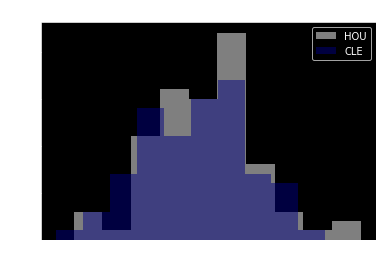

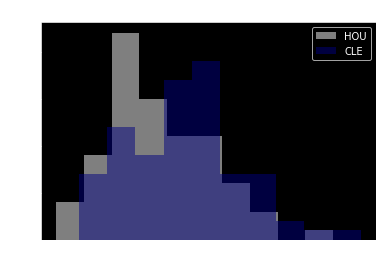

In [ ]:
nba_sims.show_team_comparisons()

Although both teams definitely had great scoring prowness, Houston's defense was definitely going to be a bigger problem for Cleveland, and from the results we could probably safely predict that they would have swept Cleveland as well.

### How Close was Houston to Winning it All?

Houston seemed to be such a strong team, so how did Golden State Warriors win by that margin? Let's simulate Houston versus Golden State Warriors.

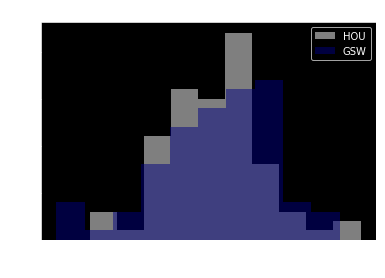

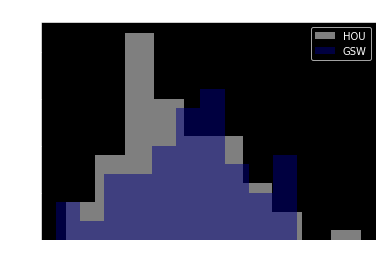

In [ ]:
nba_sims.set_teams("HOU", "GSW")
nba_sims.show_team_comparisons()


In [ ]:
nba_sims.simulate_finals()

HOU won 53.2900% of the time.
GSW won 43.6300% of the time.
Both tied at 3.0800% of the time.


Intersting, in our simulation we see that it wrongly predicts that Houston would have beaten Golden State. We can see that Houston's defense holds it's own against the Golden State Warriors, while their offense capabilities seem fairly even. However, is this portrayal of their offensive capabilities accurate?

### Final Analysis

So how come Houston was predicted as beating Golden State but in reality they didn't?

The simulator assumes that all factors in the team are consistent, when in reality they were not. For example, Steph Curry of the Golden State Warriors, one of the best scorers in the entire league, had been injured in a fair amount of regular season games and even in an actual play-off game.

Our simulator (as well as many real life analytics at the time) did not take these extra events into account. General Team Managers and Data Analytics were ranting and raving that Houston should of clearly won based on models, they failed to understand the limitations of their statistical findings.

This is the bane of most simulators, and models, they assume a certain level of consistency, a caveat that we should always be mindful of. Sometimes those limitations are apparent to subject matter experts, but more often than most they are discovered and hardened in the minds of the data scientists working the data over and over again.


# Concluding Thoughts

So Houston Fans, maybe it wasn't Harding's fault after all, perhaps the Golden State Warriors simply had a much better offensive statistic than models were able to perceive correctly.

The simulator I created is definitely an alpha release and has much room for improvement, for example we can include an enhancement to web scrape the most current NBA data, as well as introduce a skew in our simulation model that accounts for injuries or some other explanatory variables that currently are not used. A future project I would like to pursue is a simulator that is based on current team roster and their player stats used as predictors. 

Overall our research has shown how well simulators can work, and also what are the underlying limitations that we need to be aware of as well.

# References

1. [https://youtu.be/AyBNnkYrSWY](https://youtu.be/AyBNnkYrSWY)

2. [http://leios.github.io/Batman_Montecarlo](http://leios.github.io/Batman_Montecarlo)

3. [https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018](https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018)

4. [https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/](https://www.playingnumbers.com/2019/12/how-to-get-nba-data-using-the-nba_api-python-module-beginner/)

5. [https://www.landofbasketball.com/yearbyyear/2017_2018_playoffs_brackets.htm](https://www.landofbasketball.com/yearbyyear/2017_2018_playoffs_brackets.htm)

6. [https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations#:~:text=To%20summarize%2C%20Monte%20Carlo%20approximation,%E2%88%91n%3D1xn.](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations#:~:text=To%20summarize%2C%20Monte%20Carlo%20approximation,%E2%88%91n%3D1xn.)